In [32]:
%matplotlib notebook

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

In [34]:
file1=('C:\\workspace\\Resources\\ride_data.csv')
file2=('C:\\workspace\\Resources\\city_data.csv')

df_ride=pd.read_csv(file1)
df_city=pd.read_csv(file2)

df=pd.merge(df_ride, df_city, on='city',how='outer')

<IPython.core.display.Javascript object>


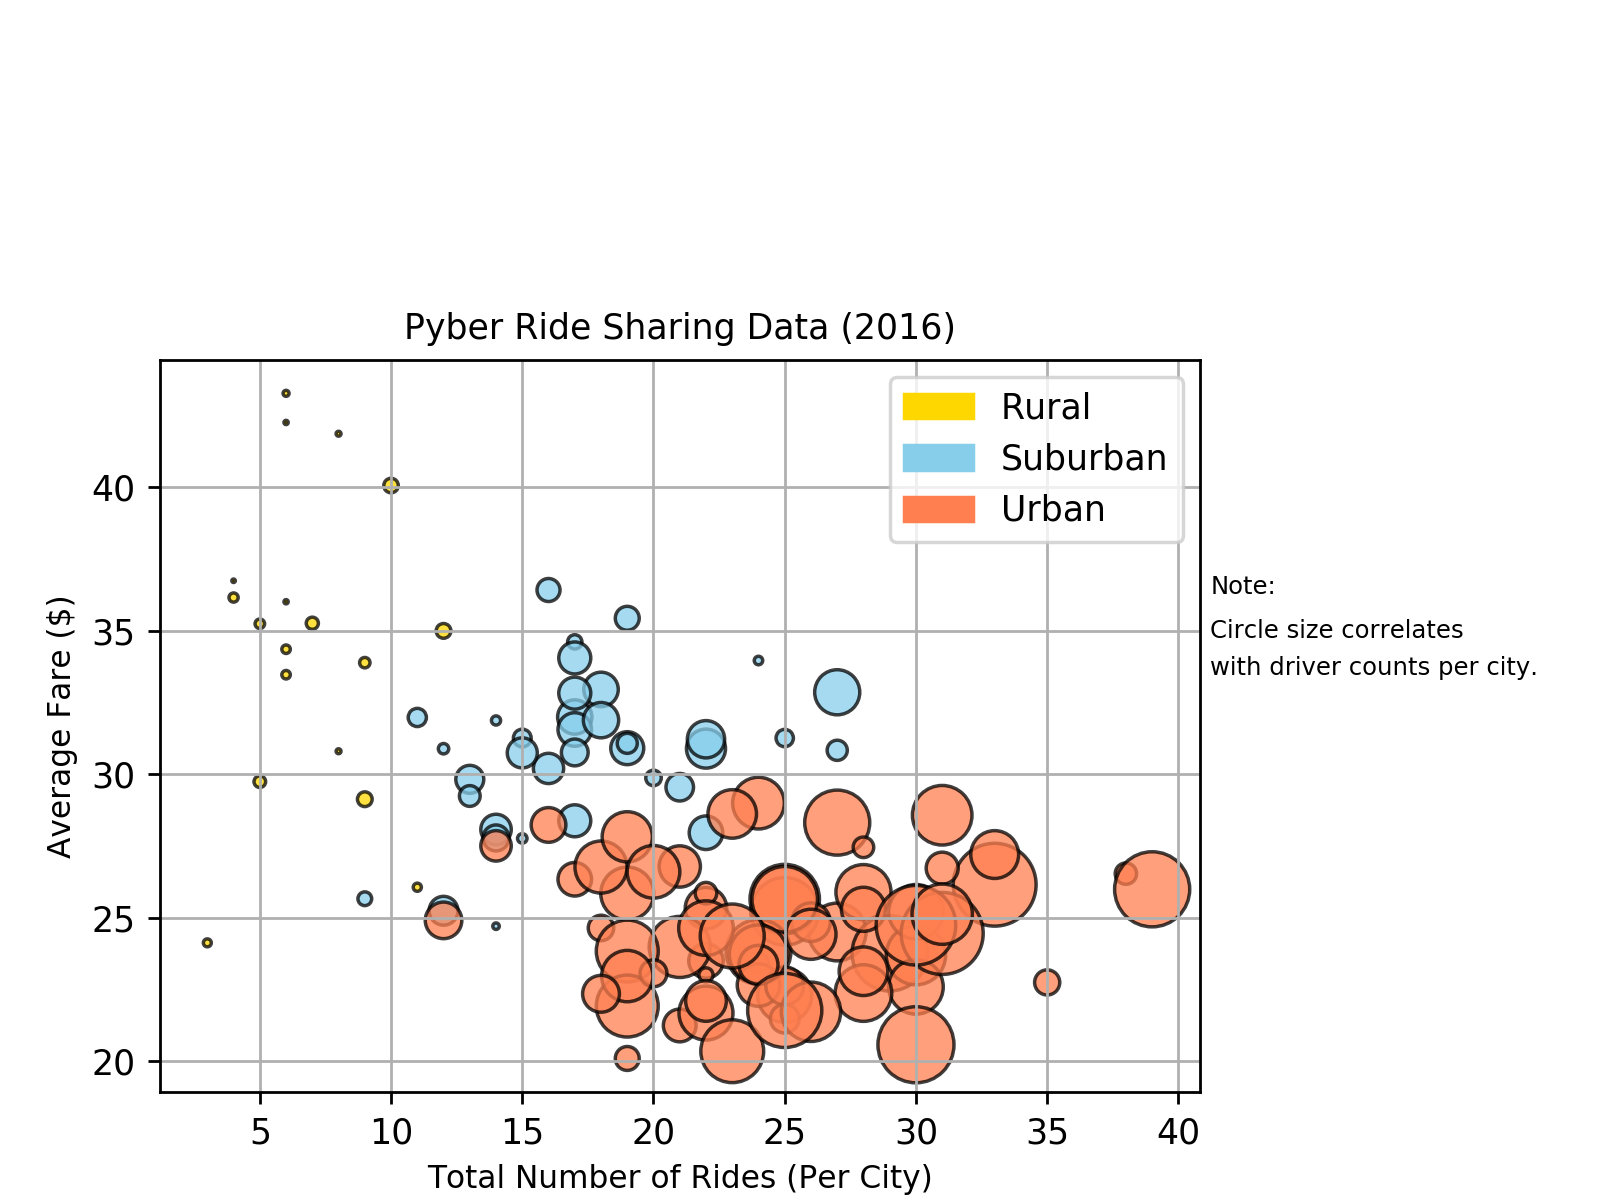

In [59]:
plt.figure(0)

df_city_type=df.groupby(['type','city'])
df_city_fare=df_city_type['fare'].mean()
df_city_ride=df_city_type['ride_id'].count()
df_city_driver=df_city_type['driver_count'].sum()

colors=[]
for types in df_city_type['type']:
    if 'Urban' in str(types):
        c='coral'
        colors.append(c)
    if 'Suburban' in str(types):
        c='skyblue'
        colors.append(c)
    if 'Rural' in str(types):
        c='gold'
        colors.append(c)
        
plt.scatter(x=df_city_ride, y=df_city_fare, marker="o", c=colors, edgecolors="black",
             s=(df_city_driver)/4, alpha=0.75)

gold_patch = mpatches.Patch(color='gold', label='Rural')
blue_patch = mpatches.Patch(color='skyblue', label='Suburban')
coral_patch = mpatches.Patch(color='coral', label='Urban')
plt.legend(handles=[gold_patch, blue_patch, coral_patch])

# legend_colors = ['black', 'red', 'green']
# legend_lines = [Line2D([1], [1], color=legend_colors, linewidth=4000, linestyle='--') for c in legend_colors]
# labels = ['black data', 'red data', 'green data']
# plt.legend(legend_lines, labels)

plt.grid()
plt.xlabel('Total Number of Rides (Per City)', size=9)
plt.ylabel('Average Fare ($)',size=9)
plt.title('Pyber Ride Sharing Data (2016)',size=10)

plt.annotate('Note:', xy=(1.01,0.68), xycoords='axes fraction',size=7)
plt.annotate('Circle size correlates', xy=(1.01,0.62), xycoords='axes fraction',size=7)
plt.annotate('with driver counts per city.', xy=(1.01,0.57), xycoords='axes fraction',size=7)

plt.subplots_adjust(left=0.1, bottom=0.09, right=0.75, top=0.7, wspace=0.5 , hspace=0.50)

plt.savefig("C:\workspace\Resources\Pyber_ride_sharing.png")
plt.show()

In [62]:
df_types_group=df.groupby(df['type'])
df_types_fare=df_types_group['fare'].sum()
df_types_ride=df_types_group['ride_id'].count()
df_types_driver=df_types_group['driver_count'].sum()

<IPython.core.display.Javascript object>


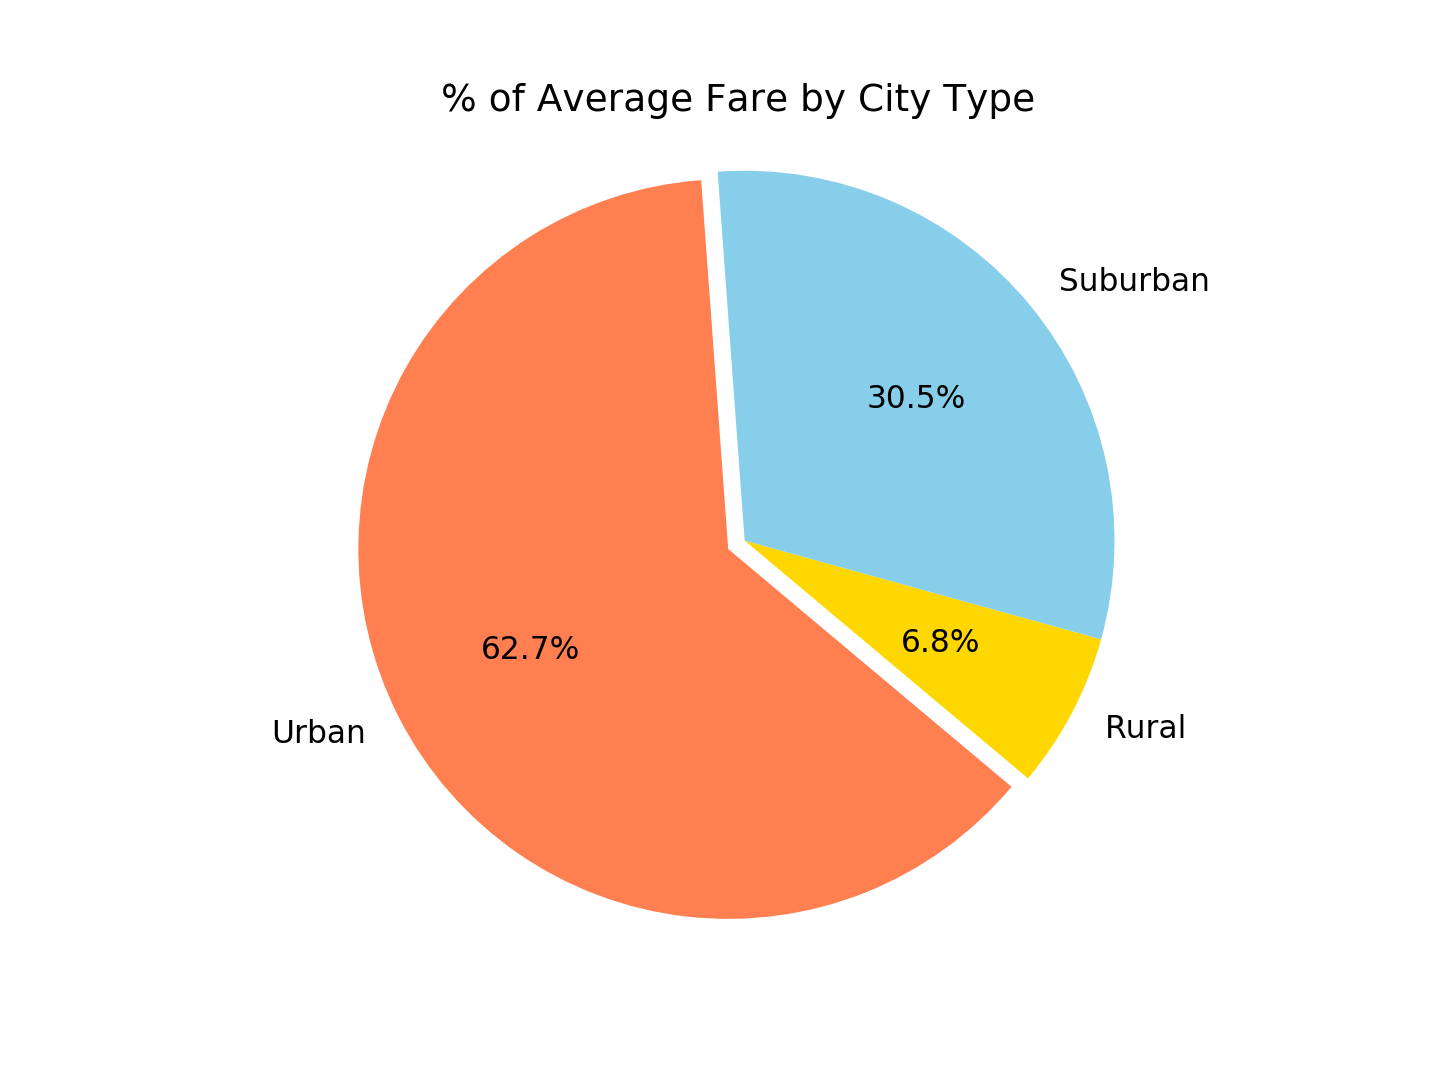

In [65]:
plt.figure(1)
labels = ['Rural','Suburban','Urban']
colors = ['Gold', 'SkyBlue', 'Coral']
plt.pie(df_types_fare,explode=(0,0,0.05), colors=colors, labels=labels,
        autopct="%1.1f%%", startangle=5000)
plt.title('% of Average Fare by City Type')
plt.axis("equal")

plt.savefig("C:\workspace\Resources\Pyber_pct_fare.png")
plt.show()

<IPython.core.display.Javascript object>


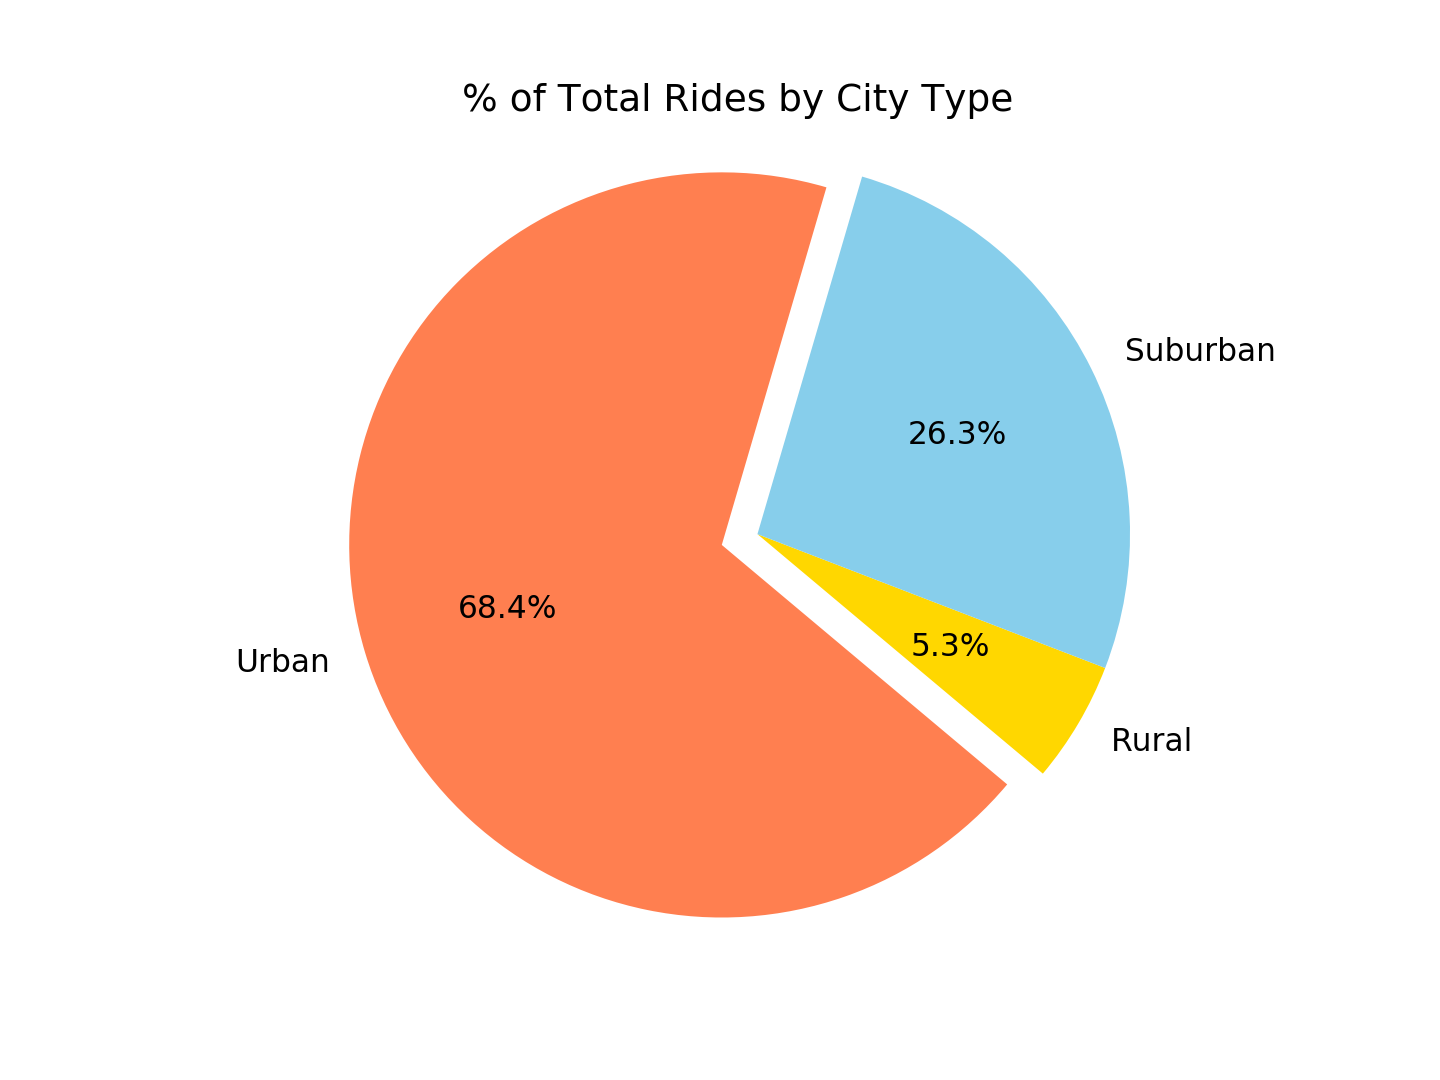

In [64]:
plt.figure(2)
plt.pie(df_types_ride, explode=(0,0,0.1), colors=colors, labels=labels,
        autopct="%1.1f%%", startangle=5000)
plt.title('% of Total Rides by City Type')
plt.axis("equal")

plt.savefig("C:\workspace\Resources\Pyber_total_ride.png")
plt.show()

<IPython.core.display.Javascript object>


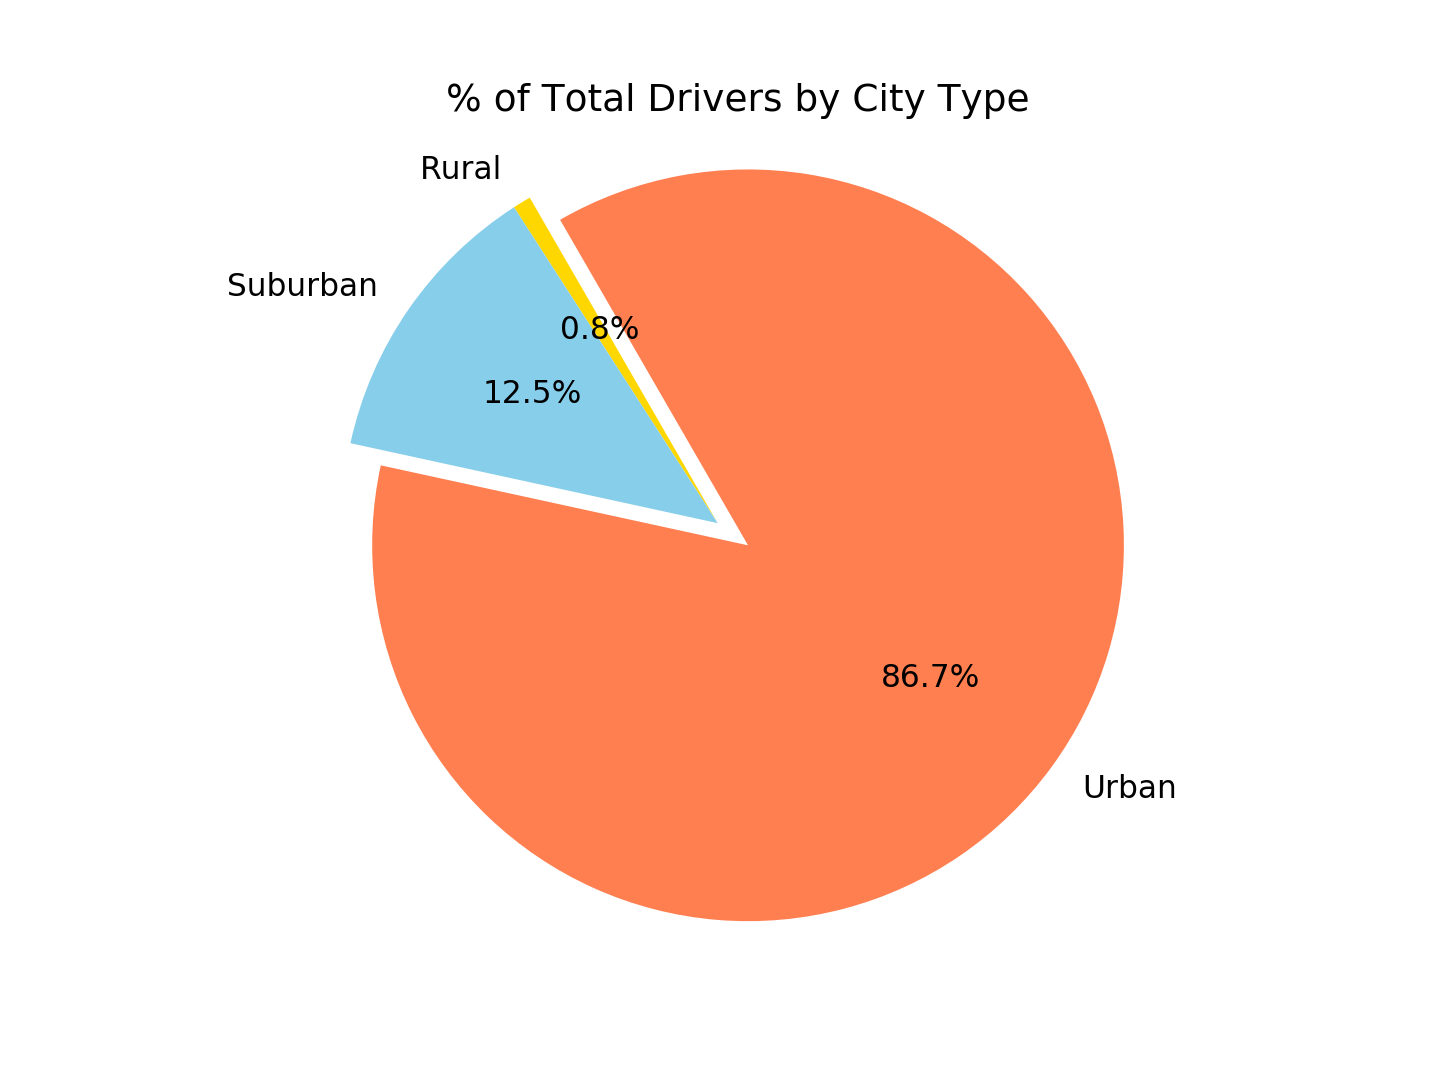

In [66]:
plt.figure(3)
plt.pie(df_types_driver, explode=(0,0,0.1), colors=colors, labels=labels,
        autopct="%1.1f%%", startangle=3000)
plt.title('% of Total Drivers by City Type')
plt.axis("equal")

plt.savefig("C:\workspace\Resources\Pyber_total_driver.png")
plt.show()